In [83]:
!pip install amazon-braket-sdk

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [84]:
# AWS imports: Import Braket SDK modules
from braket.circuits import Circuit
from braket.devices import LocalSimulator
import numpy as np
import string
from braket.circuits import Gate
from braket.circuits import Observable
import matplotlib.pyplot as plt
from braket.aws import AwsDevice

In [85]:
# print all available gates in Amazon Braket
gate_set = [attr for attr in dir(Gate) if attr[0] in string.ascii_uppercase]
print(gate_set)

['CCNot', 'CNot', 'CPhaseShift', 'CPhaseShift00', 'CPhaseShift01', 'CPhaseShift10', 'CSwap', 'CV', 'CY', 'CZ', 'ECR', 'GPi', 'GPi2', 'H', 'I', 'ISwap', 'MS', 'PSwap', 'PhaseShift', 'PulseGate', 'Rx', 'Ry', 'Rz', 'S', 'Si', 'Swap', 'T', 'Ti', 'Unitary', 'V', 'Vi', 'X', 'XX', 'XY', 'Y', 'YY', 'Z', 'ZZ']


# Circuit
U gates: https://subscription.packtpub.com/book/programming/9781838828448/6/ch06lvl1sec44/building-our-circuits-with-the-basis-gates-u1-u2-u3-and-id

In [86]:
def ret_matrix(value):
    return np.array([[np.cos(value/2), -np.exp(1j*value)*np.sin(value/2)],[np.exp(1j*value)*np.sin(value/2), np.exp(2*1j*value)*np.cos(value/2)]])

In [87]:
circuit = Circuit()

circuit.unitary(matrix=ret_matrix(0.465), targets=[1])
circuit.unitary(matrix=ret_matrix(0.465), targets=[2])
circuit.h(3)

circuit.cnot(1,0)
circuit.cnot(2,4)

circuit.unitary(matrix=ret_matrix(1.570), targets=[0])
circuit.unitary(matrix=ret_matrix(1.950), targets=[1])
circuit.unitary(matrix=ret_matrix(1.950), targets=[2])
circuit.unitary(matrix=ret_matrix(1.570), targets=[4])

circuit.h(1)
circuit.h(2)

circuit.cnot(2,1)

circuit.h(1)
circuit.h(2)

circuit.h(1)

circuit.cnot(2,1)

circuit.ti(1)

circuit.cnot(2,1)

circuit.cnot(3,2)

circuit.cnot(2,1)

circuit.t(1)
circuit.cnot(3,2)

circuit.cnot(2,1)

circuit.ti(1)

circuit.cnot(2,1)

circuit.cnot(3,2)

circuit.cnot(2,1)

circuit.t(1)
circuit.cnot(3,2)

circuit.h(1)
circuit.t(2)

circuit.h(1)
circuit.cnot(3,2)

circuit.ti(2)
circuit.t(3)

circuit.cnot(3,2)

circuit.h(2)
circuit.h(3)

circuit.cnot(2,1)
circuit.expectation(Observable.Z(), target=[3])
circuit.sample(observable=Observable.Z(), target=3)
circuit.probability(target=3)

circuit.h(2)
circuit.h(1)

print(circuit)

T  : |0|1|2|3|4|5|6|7|8 |9|10|11|12|13|14|15|16|17|18|19|20|21|22|23|24|25|            Result Types            |
                                                                                                                
q0 : ---X-U-----------------------------------------------------------------------------------------------------
        |                                                                                                       
q1 : -U-C-U-H-X-H-H-X-Ti-X----X--T--X--Ti-X-----X--T--H--H-----------X--H---------------------------------------
              |     |    |    |     |     |     |                    |                                          
q2 : -U-C-U-H-C-H---C----C-X--C--X--C-----C--X--C--X--T--X--Ti-X--H--C--H---------------------------------------
        |                  |     |           |     |     |     |                                                
q3 : -H-|------------------C-----C-----------C-----C-----C--T--C--H--------Expectation(Z)-Sample

In [88]:
print(circuit.result_types)

[Expectation(observable=Z('qubit_count': 1), target=QubitSet([Qubit(3)])), Sample(observable=Z('qubit_count': 1), target=QubitSet([Qubit(3)])), Probability(target=QubitSet([Qubit(3)]))]


# Local Simulator

In [89]:
local_device = LocalSimulator()

local_result = local_device.run(circuit, shots=10000).result()
local_counts = local_result.measurement_counts
print(local_counts)

Counter({'01100': 1591, '11100': 1096, '01101': 1080, '11101': 725, '10101': 630, '11001': 595, '10001': 589, '00101': 494, '11000': 467, '10100': 456, '01001': 449, '01000': 410, '00100': 394, '10000': 218, '00001': 218, '10110': 125, '01011': 124, '00111': 118, '11010': 116, '00000': 105})


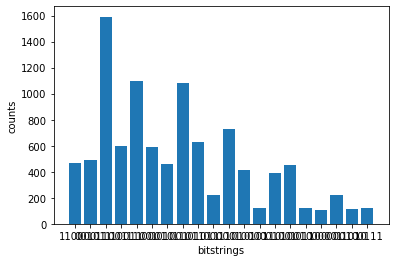

In [90]:
# plot using Counter
plt.bar(local_counts.keys(), local_counts.values());
plt.xlabel('bitstrings');
plt.ylabel('counts');

In [91]:
print("Expectation value for:", local_result.values[0])

Expectation value for: 0.9034


In [92]:
print("Sample:", local_result.values[1])

Sample: [1 1 1 ... 1 1 1]


In [93]:
print("Probability:", local_result.values[2])

Probability: [0.9517 0.0483]


# Quantum SV1

In [94]:
sv1_device = AwsDevice("arn:aws:braket:::device/quantum-simulator/amazon/sv1")

sv1_result = sv1_device.run(circuit, shots=10000).result()
sv1_counts = sv1_result.measurement_counts
print(sv1_counts)

Counter({'01100': 1611, '11100': 1104, '01101': 1043, '11101': 697, '11001': 668, '10101': 657, '10001': 546, '00101': 494, '11000': 466, '01001': 445, '10100': 417, '01000': 394, '00100': 385, '10000': 245, '00001': 197, '10110': 151, '00111': 140, '11010': 125, '01011': 118, '00000': 97})


In [95]:
print("Expectation value for:", sv1_result.values[2])

Expectation value for: [0.9466 0.0534]


# Quantum DM1

In [103]:
dm1_device = AwsDevice("arn:aws:braket:::device/quantum-simulator/amazon/dm1")

dm1_result = dm1_device.run(circuit, shots=10000).result()
dm1_counts = dm1_result.measurement_counts
print(dm1_counts)

Counter({'01100': 1596, '11100': 1072, '01101': 1036, '11101': 718, '10101': 635, '11001': 633, '10001': 532, '00101': 529, '11000': 493, '10100': 460, '01001': 458, '01000': 396, '00100': 395, '00001': 241, '10000': 205, '01011': 143, '11010': 134, '00111': 121, '10110': 107, '00000': 96})


In [104]:
print("Expectation value for:", dm1_result.values[2])

Expectation value for: [0.9495 0.0505]
